In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [9]:
df=pd.read_csv('Gaming-Trends-2024.csv')
df.head()

,Date,Platform,Daily Active Users (DAU),New Registrations,Session Duration (minutes),In-game Purchases ($),Social Media Mentions,Stream Viewership,Revenue ($),Top Genre,Influencer Endorsements
0,2022-04-13,PC,142204,14220,31.266635,60772.724060,7116,85079.542766,87378.407590,Action,0
1,2021-03-17,PC,132314,13231,23.314436,43499.834450,6582,64188.420576,41132.113751,Action,0
2,2019-03-09,VR,111557,11155,33.859334,52178.791314,5572,34385.665788,71787.342041,Simulation,0
3,2021-03-31,Console,132909,13290,80.580010,25085.562444,6619,43129.915707,18639.641156,RPG,0
4,2021-02-04,Mobile,130694,13069,37.270903,55277.074439,6555,69341.389827,63849.959750,Action,0


In [10]:
platform=list(set(df['Platform']))
platform

['PC', 'Console', 'VR', 'Mobile']

In [11]:
genre=list(set(df['Top Genre']))
genre

['Simulation', 'Action', 'Adventure', 'RPG', 'FPS']

In [12]:
df.shape

(4989, 11)

In [13]:
date=list(df['Date'].str.split('-'))
years =set([year[0] for year in date])
years


{'2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024'}

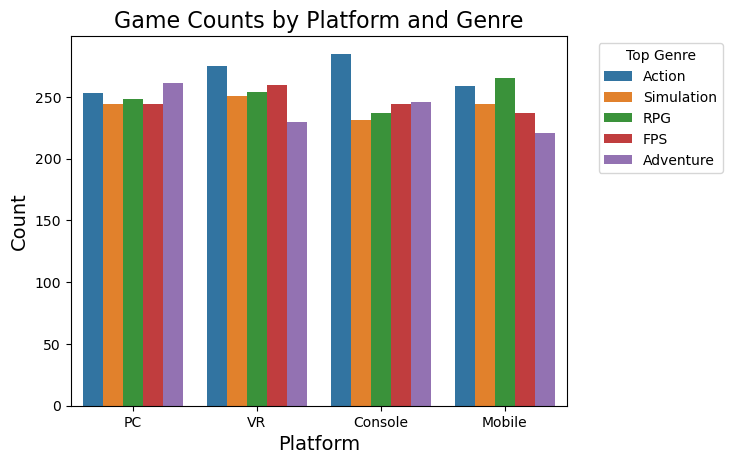

In [14]:
sns.countplot(data=df,x='Platform',hue='Top Genre')
plt.title('Game Counts by Platform and Genre', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Top Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


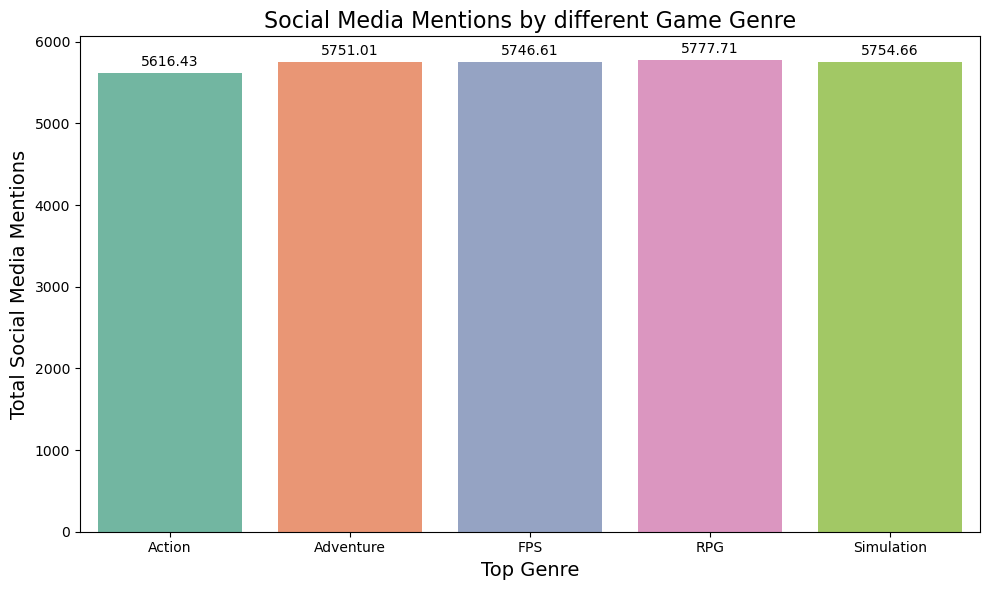

In [15]:
genre_mentions = round(df.groupby('Top Genre')['Social Media Mentions'].mean(),2).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_mentions, x='Top Genre', y='Social Media Mentions', palette='Set2')

plt.title('Social Media Mentions by different Game Genre', fontsize=16)
plt.xlabel('Top Genre', fontsize=14)
plt.ylabel('Total Social Media Mentions', fontsize=14)

for index, row in genre_mentions.iterrows():
    plt.text(index, row['Social Media Mentions'] + 50, 
             row['Social Media Mentions'], 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

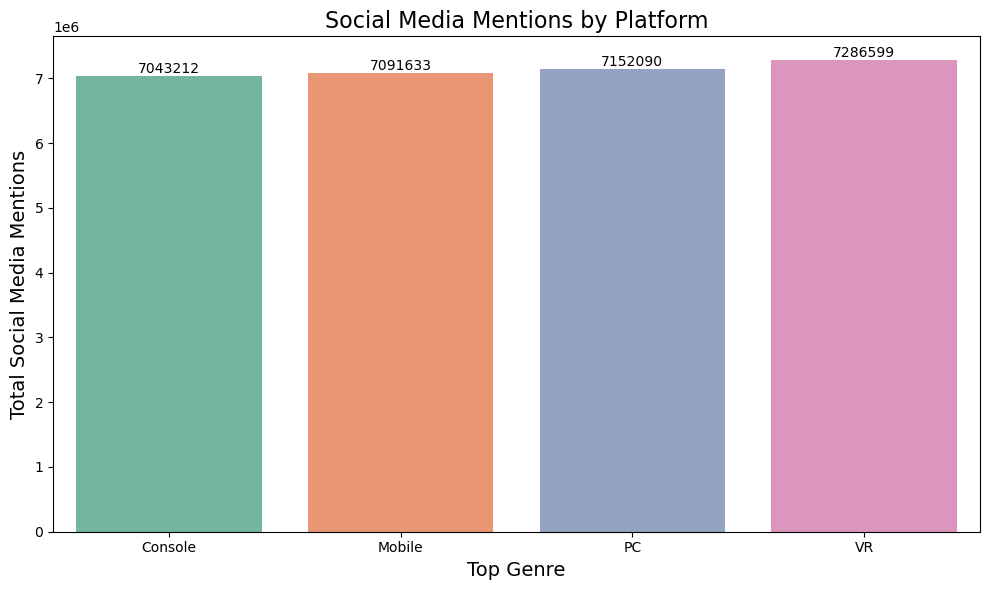

In [16]:
genre_mentions = df.groupby('Platform')['Social Media Mentions'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_mentions, x='Platform', y='Social Media Mentions', palette='Set2')

plt.title('Social Media Mentions by Platform', fontsize=16)
plt.xlabel('Top Genre', fontsize=14)
plt.ylabel('Total Social Media Mentions', fontsize=14)

for index, row in genre_mentions.iterrows():
    plt.text(index, row['Social Media Mentions'] + 50, 
             row['Social Media Mentions'], 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

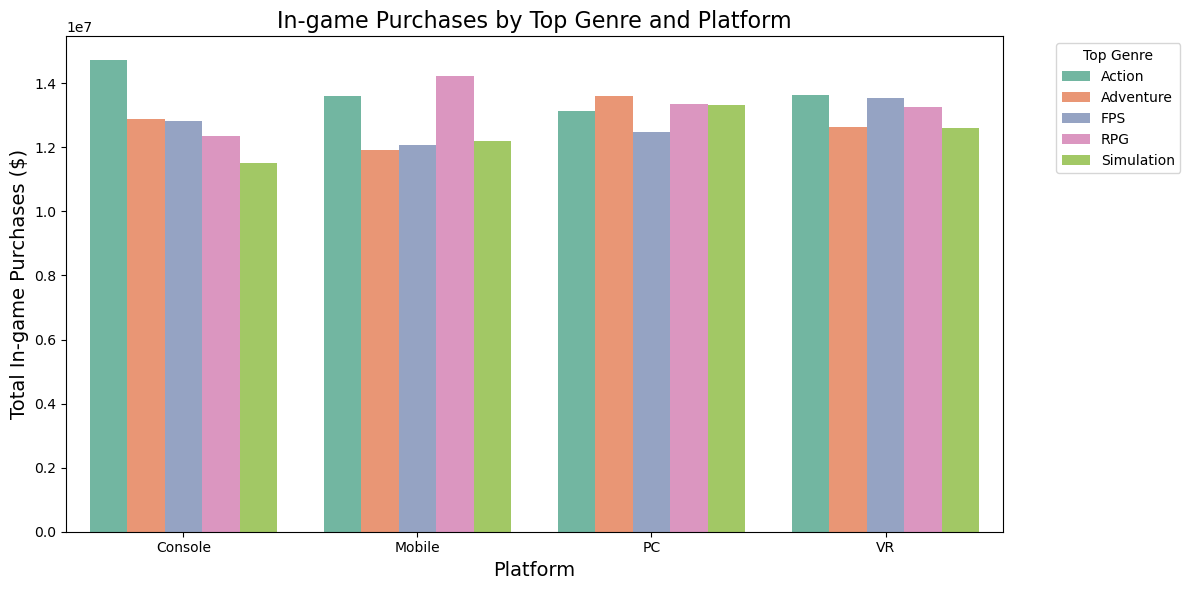

In [17]:
genre_platform_purchases = df.groupby(['Top Genre', 'Platform'])['In-game Purchases ($)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_platform_purchases, x='Platform', y='In-game Purchases ($)', hue='Top Genre', palette='Set2')

plt.title('In-game Purchases by Top Genre and Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total In-game Purchases ($)', fontsize=14)



plt.legend(title='Top Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

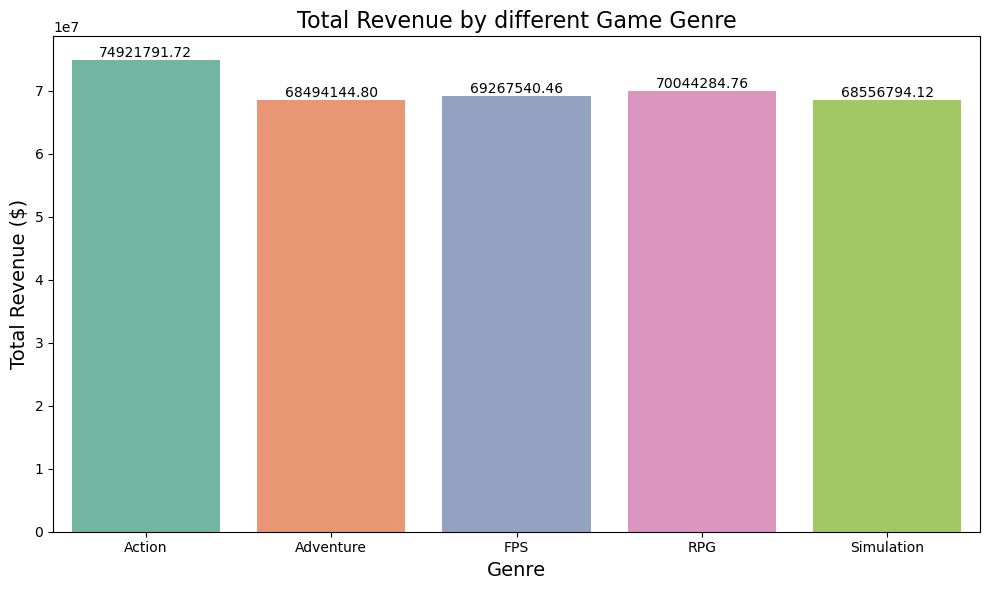

In [18]:
genre_revenue = df.groupby('Top Genre')['Revenue ($)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_revenue, x='Top Genre', y='Revenue ($)', palette='Set2')

plt.title('Total Revenue by different Game Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)

for index, row in genre_revenue.iterrows():
    plt.text(index, row['Revenue ($)'] + 1000, 
             f'{row["Revenue ($)"]:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

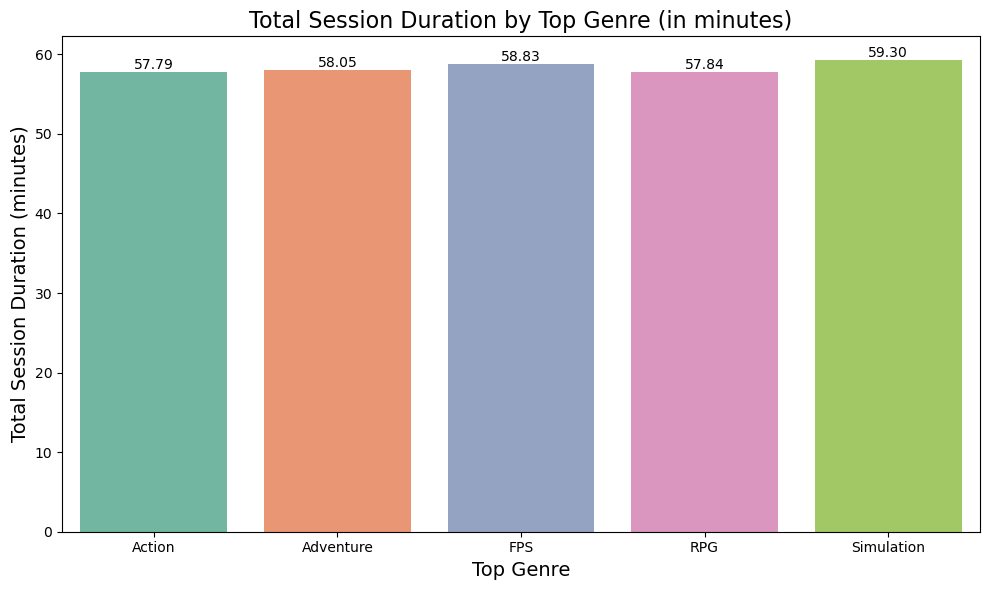

In [19]:
genre_session_duration = df.groupby('Top Genre')['Session Duration (minutes)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_session_duration, x='Top Genre', y='Session Duration (minutes)', palette='Set2')

plt.title('Total Session Duration by Top Genre (in minutes)', fontsize=16)
plt.xlabel('Top Genre', fontsize=14)
plt.ylabel('Total Session Duration (minutes)', fontsize=14)

for index, row in genre_session_duration.iterrows():
    plt.text(index, row['Session Duration (minutes)'], 
             f'{row["Session Duration (minutes)"]:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

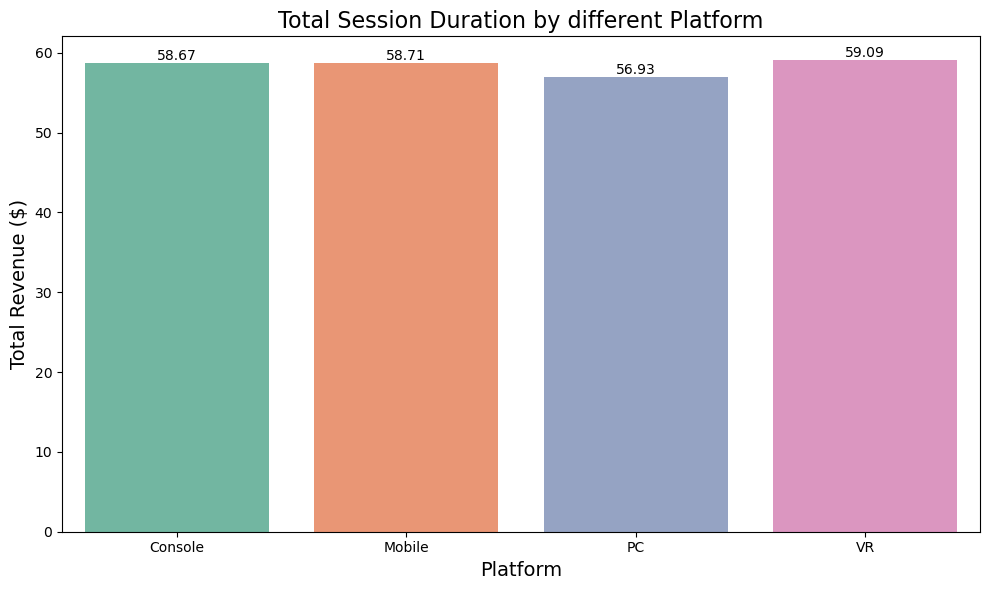

In [20]:
genre_revenue = df.groupby('Platform')['Session Duration (minutes)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_revenue, x='Platform', y='Session Duration (minutes)', palette='Set2')

plt.title('Total Session Duration by different Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)

for index, row in genre_revenue.iterrows():
    plt.text(index, row['Session Duration (minutes)'], 
             f'{row["Session Duration (minutes)"]:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()